In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

# General
Assume each episode represents 5 minutes:
+ 1 day is about 300 episodes
+ 3 days (lifetime) is about 900 episodes
+ 1 weeks (horizon) is about 2000 episodes

In the 50% CTR settings:
+ we make an effective 3 x 50 x episode_length impressions per episode
+ to achieve 300 impressions per minute -> episode_length = 10

In the 1% CTR settings:
+ we make 3 x episode_length impressions per episode
+ to achieve 300 impressions per minute -> episode_length = 500

Effective item count is the average number of items that are in the pool at any given time
+ equal to K * L / T

In [51]:
def varsim(n, p):
    return n*p*(1-p)

p = 0.01
n = 100

a = 10
p2 = a*p
n2 = 10

varsim(n, p), varsim(n2, p2), n, n2

(0.99, 0.9, 100, 10)

In [3]:
def run_benchmark(sim, setting):
    sim.set_setting(setting)
    sim.run_oracle()
    
    sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': 0.1, 'q0': 1})
    sim.run_agent(ThompsonAgent, {'ws': 3000})
    sim.run_agent(FroomleAgent, {'boost_denominator':500, 'boost_rank':2})
    sim.run_agent(FroomleAgent, {'boost_denominator':50, 'boost_rank':2, 'ws':3000})

# Do longer horizons matter?

No, increasing the horizon by some factor x while maintaining the same number of effective items:
+ doesn't change the average ctrs ratios
+ doesn't change the slope of the cumregret curves
+ scales the final cumregret by x

Note: changing how fast the setting evolves doesn't influence this.

=> Use horizon of 2000 and look at the last 1000 episodes.

 S3(T=5000x25, K=120/3, b=0.5±0.2, σ=0.001±0.0005, s=200) 
     0.507 ±0.004      - SW-FR(d=50, r=2, ws=3000)
     0.503 ±0.004      - SW-TS(ws=3000)
     0.494 ±0.004      - FR(d=500, r=2)
     0.481 ±0.004      - EG(eps=0.1, lr=0.1, q0=1)

 S3(T=5000x25, K=120/3, b=0.5±0.2, σ=0.001±0.0005, s=200) 
     0.506 ±0.007      - SW-FR(d=50, r=2, ws=3000)
     0.502 ±0.006      - SW-TS(ws=3000)
     0.492 ±0.008      - FR(d=500, r=2)
     0.479 ±0.006      - EG(eps=0.1, lr=0.1, q0=1)



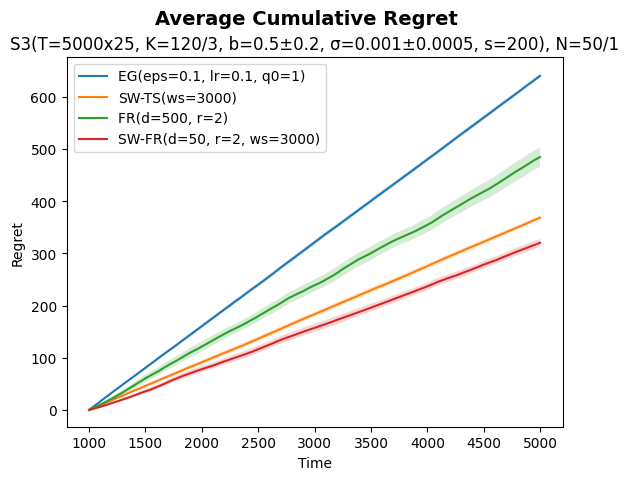

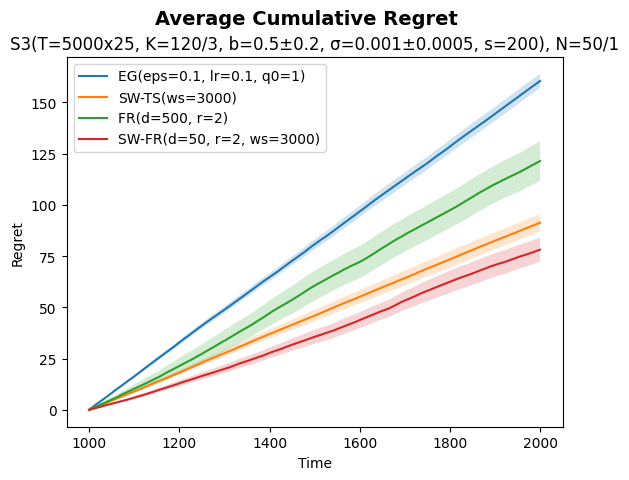

In [20]:
# sim = Simulator(run_count=50, seed_change_interval=1)
# setting = NewsSimulationSetting2(
#     SettingConfig(
#         episode_count=5000, 
#         item_count=120, 
#         k=3, 
#         episode_length=25
#     ),
#     lifetime=900,
#     ctr_base=0.5,
#     ctr_fuzz=0.2,
#     sigma_base=10e-4,
#     sigma_fuzz=5e-4,
#     smoothing=200,
#     rank_factor=0.3
# )
# run_benchmark(sim, setting)
# sim_horizons = sim

confidence = 0.95
sim_horizons.results.ctrs(tmin=1000, tmax=None, relative=False, confidence=confidence)
sim_horizons.results.ctrs(tmin=1000, tmax=2000, relative=False, confidence=confidence)
sim_horizons.results.create_regret_plot(tmin=1000, tmax=None, confidence=confidence)
sim_horizons.results.create_regret_plot(tmin=1000, tmax=2000, confidence=confidence)

# Does the scale matter?

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

 S3(T=2000x100, K=60/3, b=0.05±0.02, σ=0.001±0.0005, s=200) 
     0.048 ±0.002      - SW-FR(d=50, r=2, ws=10000)
     0.047 ±0.002      - SW-TS(ws=50000)

 S3(T=2000x10, K=60/3, b=0.5±0.2, σ=0.001±0.0005, s=200) 
     0.487 ±0.028      - SW-FR(d=5, r=2, ws=1000)
     0.482 ±0.025      - SW-TS(ws=5000)



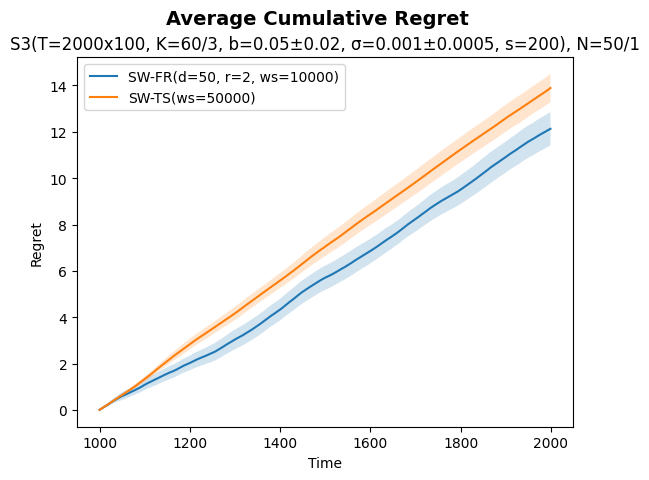

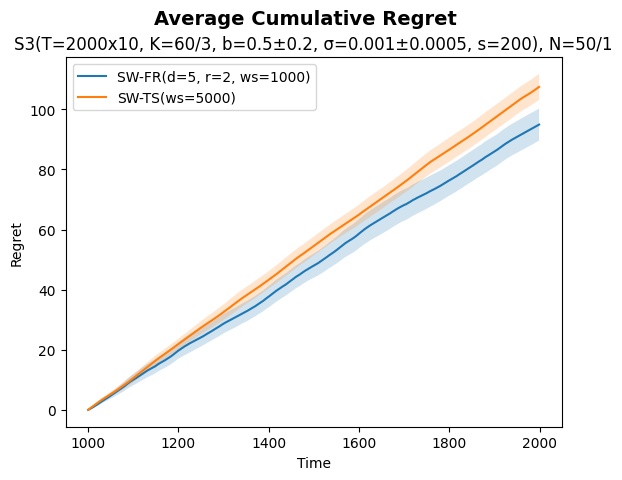

In [21]:
# sim = Simulator(run_count=50, seed_change_interval=1)
# setting = NewsSimulationSetting2(
#     SettingConfig(
#         episode_count=2000, 
#         item_count=60, 
#         k=3, 
#         episode_length=1
#     ),
#     lifetime=900,
#     ctr_base=0.5,
#     ctr_fuzz=0.2,
#     sigma_base=0.001,
#     sigma_fuzz=0.0005,
#     smoothing=200
# )
    
# # 100
# setting.episode_length = 100
# setting.ctr_base = 0.05
# setting.ctr_fuzz = 0.02
# sim.set_setting(setting)
# sim.run_oracle()
# sim.run_agent(FroomleAgent, {'boost_denominator': 50, 'boost_rank': 2, 'ws': 10000})
# sim.run_agent(ThompsonAgent, {'ws': 50000})

# # 10
# setting.episode_length = 10
# setting.ctr_base = 0.5
# setting.ctr_fuzz = 0.2
# sim.set_setting(setting)
# sim.run_oracle()
# sim.run_agent(FroomleAgent, {'boost_denominator': 5, 'boost_rank': 2, 'ws': 1000})
# sim.run_agent(ThompsonAgent, {'ws': 5000})
    
# sim_scale = sim

sim_scale.results.ctrs(tmin=1000, relative=False, confidence=None)
sim_scale.results.create_regret_plot(tmin=1000)

In [143]:
sim_s3_b = Simulator(run_count=25, seed_change_interval=1)
for scale in [1, 5]:
    s3.ctr_base = 0.3 / scale
    s3.ctr_fuzz = 0.1 / scale
    s3.episode_length = 10 * scale
    run_benchmark(sim_s3_b, s3)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

 S3(T=4000x10, K=120/3, b=0.3±0.1, σ=0.0005±0.0002, s=150) 
     0.905 ±0.010      - SW-FR(d=50, r=2, ws=3000)
     0.899 ±0.016      - FR(d=500, r=2)
     0.873 ±0.009      - SW-TS(ws=3000)
     0.827 ±0.017      - EG(eps=0.1, lr=0.1, q0=1)

 S3(T=4000x50, K=120/3, b=0.06±0.02, σ=0.0005±0.0002, s=150) 
     0.874 ±0.038      - FR(d=500, r=2)
     0.872 ±0.012      - SW-FR(d=50, r=2, ws=3000)
     0.738 ±0.018      - EG(eps=0.1, lr=0.1, q0=1)
     0.659 ±0.027      - SW-TS(ws=3000)



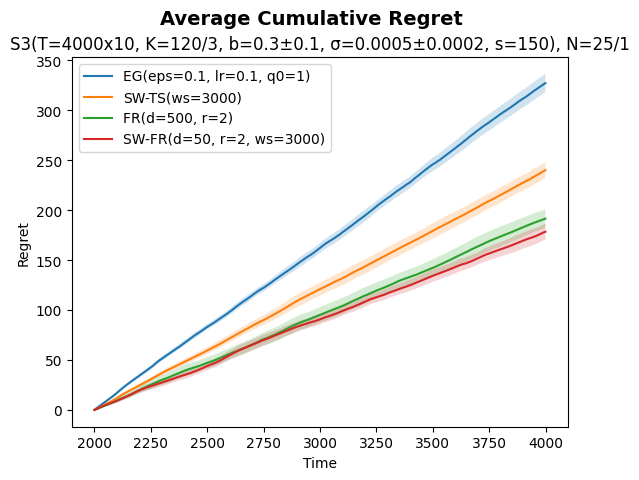

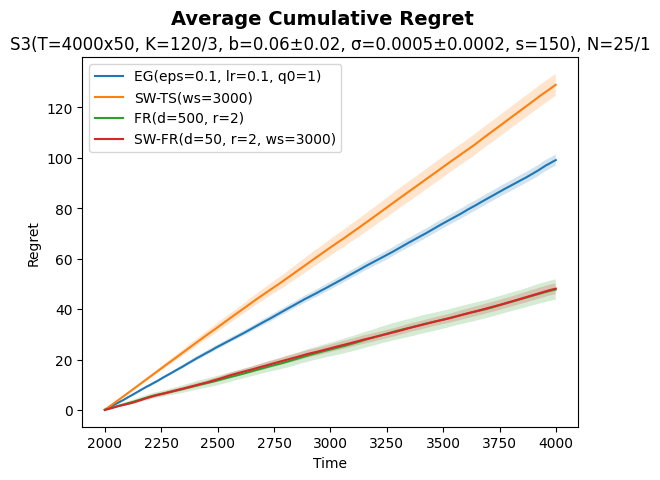

 S3(T=4000x10, K=120/3, b=0.3±0.1, σ=0.0005±0.0002, s=150) 
     178.5 ±7.9        - SW-FR(d=50, r=2, ws=3000)
     191.6 ±9.3        - FR(d=500, r=2)
     240.1 ±8.0        - SW-TS(ws=3000)
     327.2 ±9.2        - EG(eps=0.1, lr=0.1, q0=1)

 S3(T=4000x50, K=120/3, b=0.06±0.02, σ=0.0005±0.0002, s=150) 
      47.8 ±4.0        - FR(d=500, r=2)
      48.1 ±2.1        - SW-FR(d=50, r=2, ws=3000)
      99.1 ±2.2        - EG(eps=0.1, lr=0.1, q0=1)
     129.0 ±4.3        - SW-TS(ws=3000)



In [145]:
sim_s3_b.results.ctrs(tmin=2000, relative=True, confidence=None)
sim_s3_b.results.create_regret_plot(tmin=2000)
sim_s3_b.results.rank(tmin=2000)